In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv("C:/Users/loges/clickstream/train dataset with Scaled.csv")

In [3]:
df.columns

Index(['month', 'day', 'order', 'price', 'price_2', 'page', 'sessions_per_day',
       'page_views_per_session_id', 'is_bounce', 'is_revisit', 'is_exit',
       'exit_rate', 'day_of_week', 'time_spent_per_category',
       'total_clicks_per_session_id', 'page2_grouped_Category 1',
       'page2_grouped_Category 2', 'page2_grouped_Category 3',
       'page2_grouped_Other', 'country_16', 'country_21', 'country_24',
       'country_29', 'country_34', 'country_41', 'country_44', 'country_46',
       'country_Other', 'colour_3', 'colour_4', 'colour_6', 'colour_9',
       'colour_14', 'colour_Other', 'location_2', 'location_3', 'location_4',
       'location_5', 'location_6', 'model_photography_2',
       'page1_main_category_2', 'page1_main_category_3',
       'page1_main_category_4', 'path_length', 'first_page_freq',
       'last_page_freq'],
      dtype='object')

In [4]:
df.shape

(132379, 46)

In [5]:
df.head()

,month,day,order,price,price_2,page,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,...,location_4,location_5,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page_freq,last_page_freq
0,4,1,2,-0.860347,2,1,4.052093,-0.411866,0,1,...,0,0,1,0,0,0,0,-0.411866,-0.34856,3.182581
1,4,1,3,0.654884,1,1,4.052093,-0.411866,0,1,...,0,0,0,0,1,0,0,-0.411866,-0.34856,3.182581
2,4,1,4,-0.461602,2,1,4.052093,-0.411866,0,1,...,0,0,1,1,1,0,0,-0.411866,-0.34856,3.182581
3,4,1,5,0.654884,1,1,4.052093,-0.411866,0,0,...,0,0,0,1,1,0,0,-0.411866,-0.34856,3.182581
4,4,1,6,1.053629,1,4,4.052093,-0.411866,0,1,...,0,0,0,1,0,1,0,-0.411866,-0.34856,3.182581


In [ ]:
# Clustering model KMeans

In [13]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df)
k_means.inertia_

37085185.745888665

In [14]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df)
k_means.inertia_

15587310.642113548

In [15]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df)
k_means.inertia_

9971993.430917958

In [16]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(df)
k_means.inertia_

6060584.836072459

In [17]:
k_means = KMeans(n_clusters = 12,random_state=1)
k_means.fit(df)
k_means.inertia_

4887598.381351441

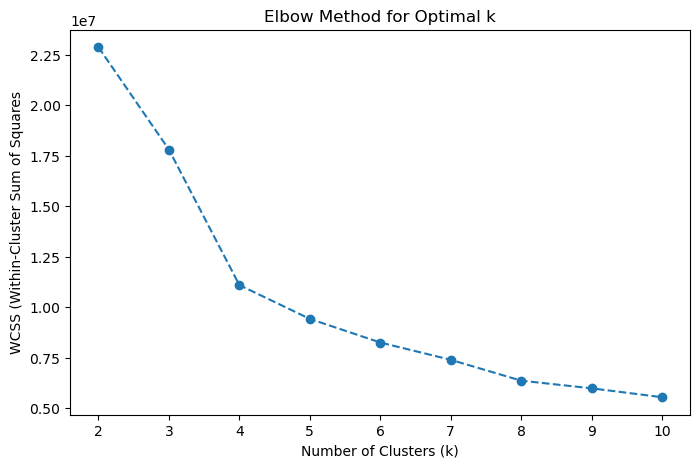

In [4]:
# Elbow method (Find the best K)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

x = pd.read_csv("C:/Users/loges/clickstream/train dataset with Scaled.csv")

wcss =[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares")
plt.title("Elbow Method for Optimal k")
plt.show()

In [14]:
# Silhouette Score(Measure Cluster Quality)

from sklearn.metrics import silhouette_score

best_k = 8

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_lables = kmeans.fit_predict(x)

silhouette_avg = silhouette_score(x, cluster_lables)
print(f"Silhouette Score for k={best_k}: {silhouette_avg:.4f}")

Silhouette Score for k=8: 0.2931


In [5]:
# Silhouette Score(Measure Cluster Quality)

from sklearn.metrics import silhouette_score

best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_lables = kmeans.fit_predict(x)

silhouette_avg = silhouette_score(x, cluster_lables)
print(f"Silhouette Score for k={best_k}: {silhouette_avg:.4f}")

Silhouette Score for k=4: 0.3930


In [7]:
# Silhouette Score(Measure Cluster Quality)

from sklearn.metrics import silhouette_score

best_k = 5

kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_lables = kmeans.fit_predict(x)

silhouette_avg = silhouette_score(x, cluster_lables)
print(f"Silhouette Score for k={best_k}: {silhouette_avg:.4f}")

Silhouette Score for k=5: 0.3858


In [10]:
# best k value 4

best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(x)

In [11]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(x, cluster_labels)
print(f"Davis-Boulidin Index: {db_score:.4f}")

Davis-Boulidin Index: 0.8226


In [12]:
# best k value 5

best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(x)

In [13]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(x, cluster_labels)
print(f"Davis-Boulidin Index: {db_score:.4f}")

Davis-Boulidin Index: 0.8626


In [12]:
# lower DB for k=4 & Silhouette Score high so k=4 as selected


from sklearn.cluster import KMeans
import pandas as pd


kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

import joblib
joblib.dump(kmeans, "D:/Project/Clickstream_Project/Clickstream/Model/Kmeans_model.pkl")

print("k-Means Clustring Model Trained & Saved!")

k-Means Clustring Model Trained & Saved!


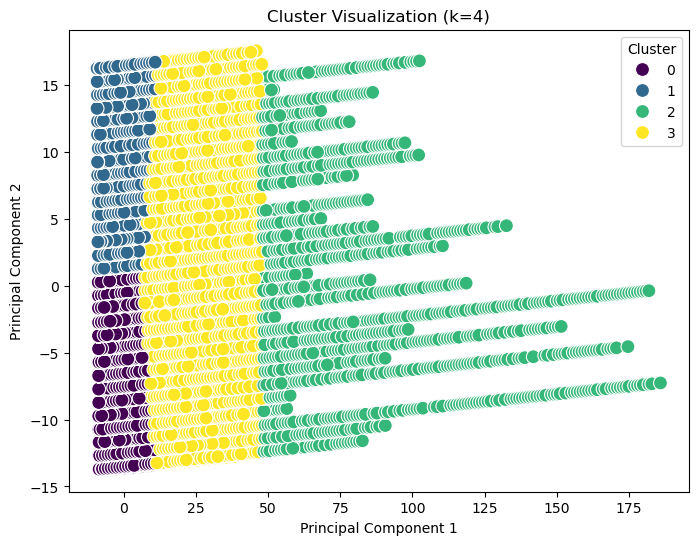

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv("C:/Users/loges/clickstream/train dataset with Scaled.csv")  

# Selecting relevant numerical features
X = df.select_dtypes(include=[np.number])  

# Fit K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df["Cluster"], palette="viridis", data=df, s=100)
plt.title("Cluster Visualization (k=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

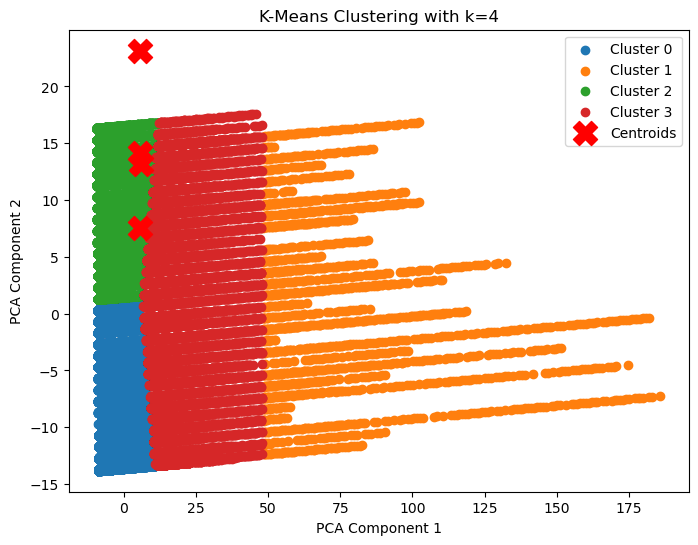

In [16]:
# 2 one

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

# Assuming X is your dataset after preprocessing
best_k = 4  # Choose 4 or 5 based on elbow method
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to dataset (optional)
X['Cluster'] = cluster_labels



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=['Cluster']))  # Drop cluster column if added

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for i in range(best_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')  # Mark centroids
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering with k={best_k}')
plt.legend()
plt.show()

In [17]:
df["Clusters"] = kmeans.labels_

In [20]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,month,day,order,price,price_2,page,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,...,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page_freq,last_page_freq,PCA1,PCA2,Clusters
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5.694976,7.531157,5.811211,0.022839,1.487507,1.640704,0.177733,-0.236808,0.048316,0.804188,...,0.251151,0.246660,0.226563,0.214619,-0.236808,-0.050988,-0.003941,-3.867601,-7.069220,0.0000
1,5.440751,23.143139,5.908526,0.023544,1.489374,1.657833,-0.197414,-0.239548,0.046493,0.805602,...,0.251041,0.240406,0.228763,0.213053,-0.239548,-0.050292,0.004548,-4.126854,8.546682,2.0000
2,5.962162,13.207027,86.017838,-0.186792,1.497838,2.336216,-0.257688,4.416787,0.000000,0.985946,...,0.337838,0.129189,0.341081,0.355135,4.416787,0.726376,0.077905,76.681584,0.448169,1.0000
3,5.556817,14.180289,29.154099,-0.142988,1.488363,2.092844,-0.030616,1.183209,0.000000,0.965680,...,0.314467,0.151741,0.263390,0.363806,1.183209,0.276430,-0.008156,19.489692,0.117560,2.9982


In [25]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca.fit(X)

pca_components = pd.DataFrame(pca.components_, columns=df.columns[:-3])
pca_components

,month,day,order,price,price_2,page,sessions_per_day,page_views_per_session_id,is_bounce,is_revisit,...,location_5,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,page1_main_category_4,path_length,first_page_freq,last_page_freq,Cluster
0,0.002666,-0.021056,0.992734,-0.004819,0.000044,0.014786,-0.001964,0.058737,-0.001967,0.005486,...,-0.000245,0.000431,0.001893,-0.002522,0.001918,0.003804,0.058737,0.011594,0.000304,0.027286
1,-0.010824,0.995496,0.018631,-0.000426,0.000260,0.002030,-0.032540,-0.000116,-0.000195,0.000250,...,-0.000151,0.000106,0.000077,-0.000405,0.000283,0.000067,-0.000116,-0.000364,0.000297,0.086352


2025/03/03 23:52:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Silhouette Score: 0.4026
Davies-Bouldin Index: 0.8137
🏃 View run fun-crow-221 at: http://127.0.0.1:5000/#/experiments/913550932116842255/runs/a04acb656b634ec8956de5ee35506c35
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/913550932116842255


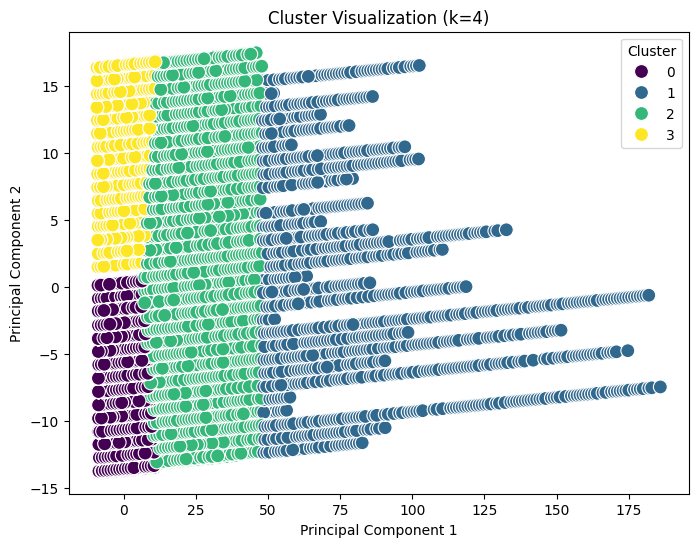

In [27]:
import mlflow
mlflow.set_experiment("ClickStream CLustering Model")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

# Selecting numerical features
X = df.select_dtypes(include=[np.number]) 

with mlflow.start_run():
    #log dataset
    mlflow.log_param("Dataset Shape", X.shape)

    # Hyperparameters to test
    best_k = 4  # Based on elbow method
    mlflow.log_param("Number_of_Clusters_k", best_k)
    
    # Train K-Means model
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Evaluate clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    
    mlflow.log_metric("Silhouette Score", silhouette_avg)
    mlflow.log_metric("Davies-Bouldin Index", db_index)
    
    mlflow.sklearn.log_model(kmeans, "kmeans_model")
    
    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    df["PCA1"] = X_pca[:, 0]
    df["PCA2"] = X_pca[:, 1]
    df["Cluster"] = cluster_labels
    
    # Save cluster visualization
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="PCA1", y="PCA2", hue=df["Cluster"], palette="viridis", data=df, s=100)
    plt.title("Cluster Visualization (k=4)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.savefig("cluster_plot.png")  # Save plot
    mlflow.log_artifact("cluster_plot.png")  # Log plot

    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")